In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import joblib as job
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("mushroom.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])
df["cap-shape"]=le.fit_transform(df["cap-shape"])
df["cap-surface"]=le.fit_transform(df["cap-surface"])
df["cap-color"]=le.fit_transform(df["cap-color"])
df["bruises"]=le.fit_transform(df["bruises"])
df["odor"]=le.fit_transform(df["odor"])
df["gill-attachment"]=le.fit_transform(df["gill-attachment"])
df["gill-spacing"]=le.fit_transform(df["gill-spacing"])
df["gill-size"]=le.fit_transform(df["gill-size"])
df["gill-color"]=le.fit_transform(df["gill-color"])
df["stalk-shape"]=le.fit_transform(df["stalk-shape"])
df["stalk-root"]=le.fit_transform(df["stalk-root"])
df["stalk-surface-above-ring"]=le.fit_transform(df["stalk-surface-above-ring"])
df["stalk-surface-below-ring"]=le.fit_transform(df["stalk-surface-below-ring"])
df["stalk-color-above-ring"]=le.fit_transform(df["stalk-color-above-ring"])
df["stalk-color-below-ring"]=le.fit_transform(df["stalk-color-below-ring"])
df["veil-type"]=le.fit_transform(df["veil-type"])
df["veil-color"]=le.fit_transform(df["veil-color"])
df["ring-number"]=le.fit_transform(df["ring-number"])
df["ring-type"]=le.fit_transform(df["ring-type"])
df["spore-print-color"]=le.fit_transform(df["spore-print-color"])
df["population"]=le.fit_transform(df["population"])
df["habitat"]=le.fit_transform(df["habitat"])

<AxesSubplot:>

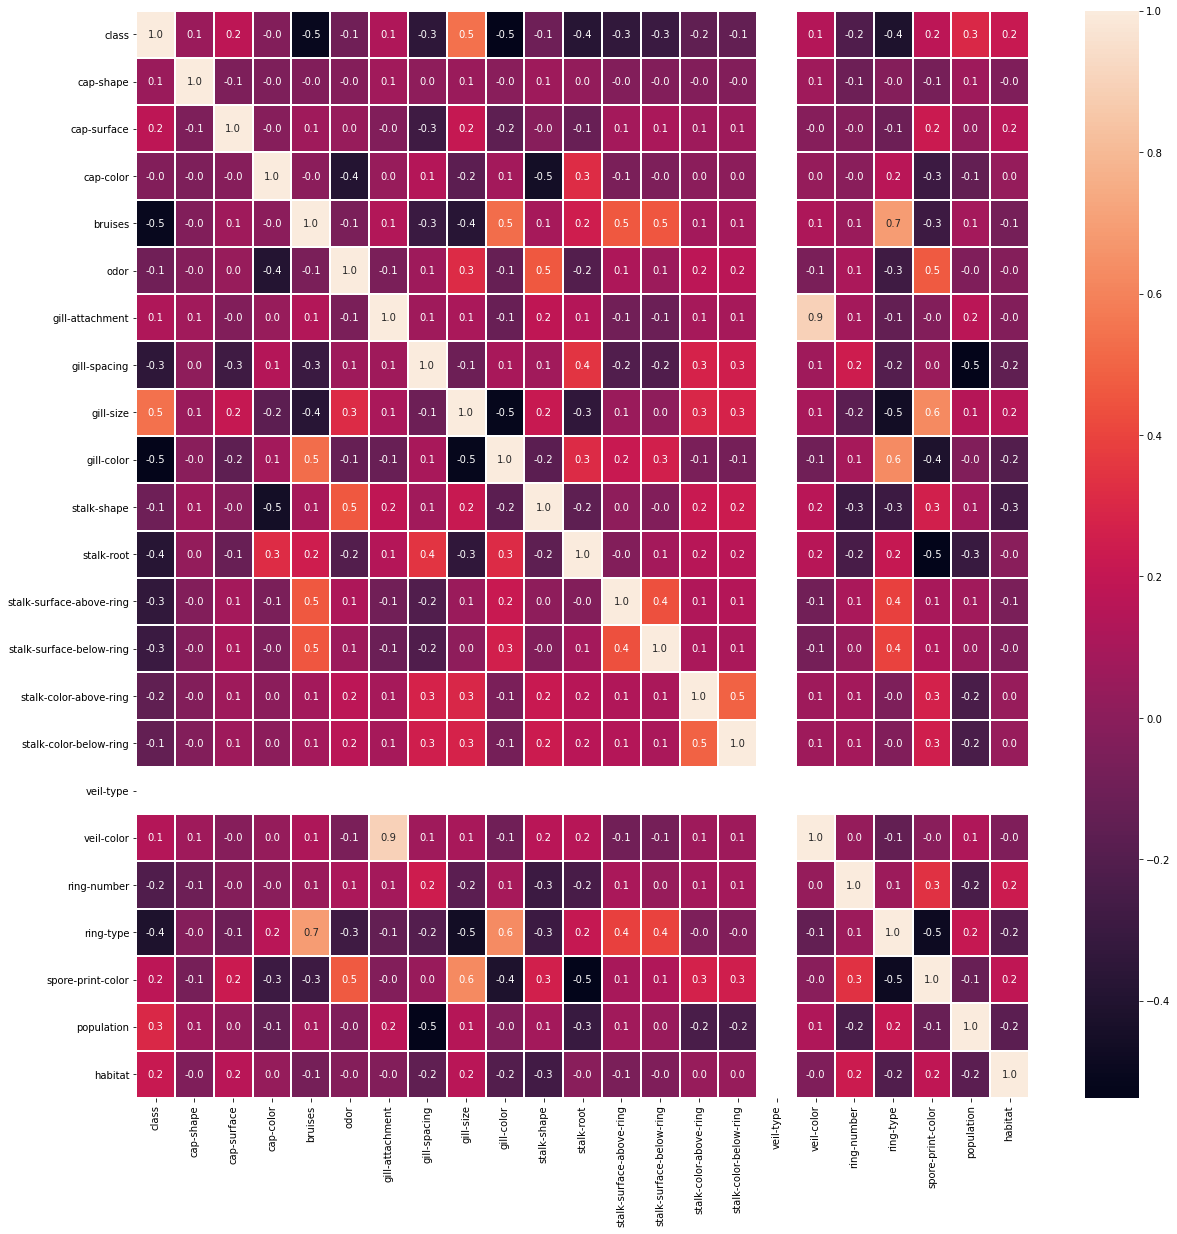

In [8]:
plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot = True, linewidths = 1,fmt= '.1f')

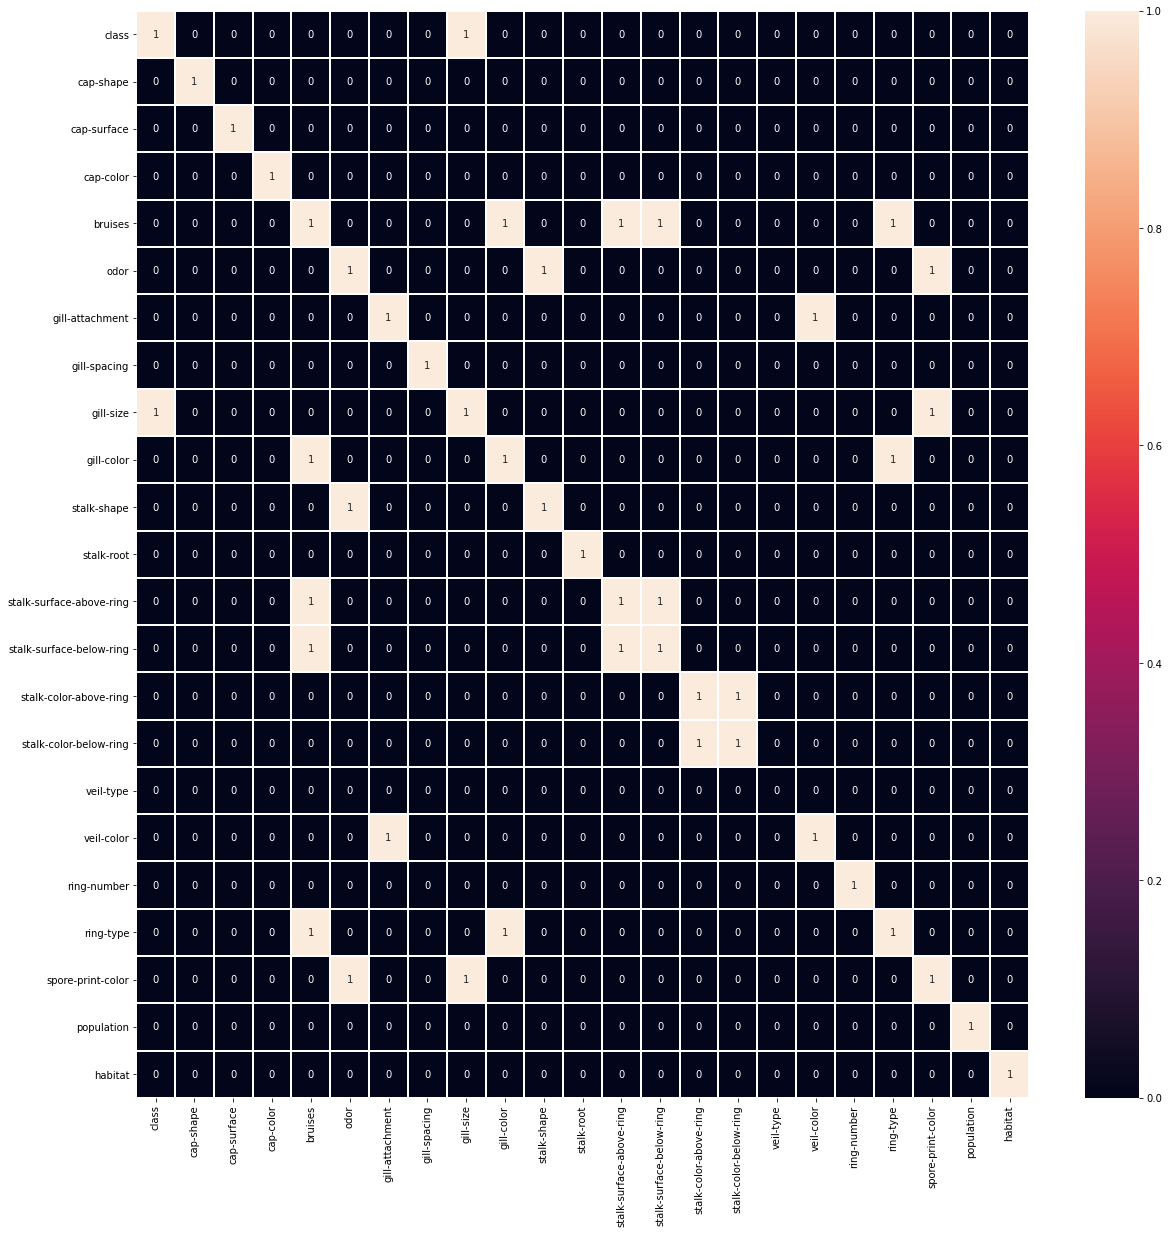

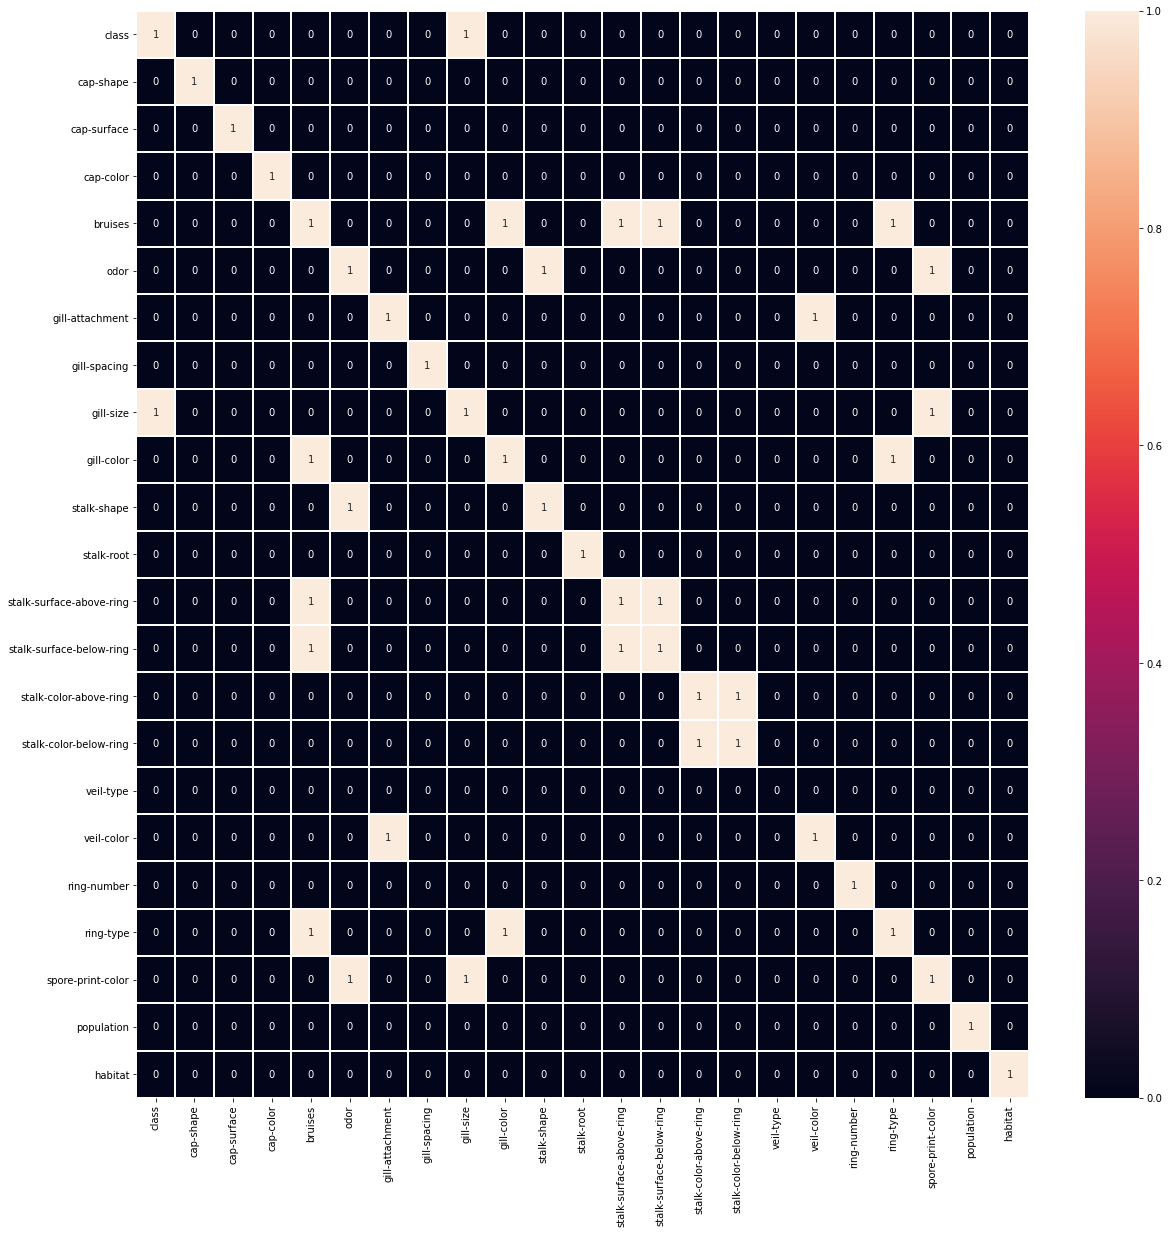

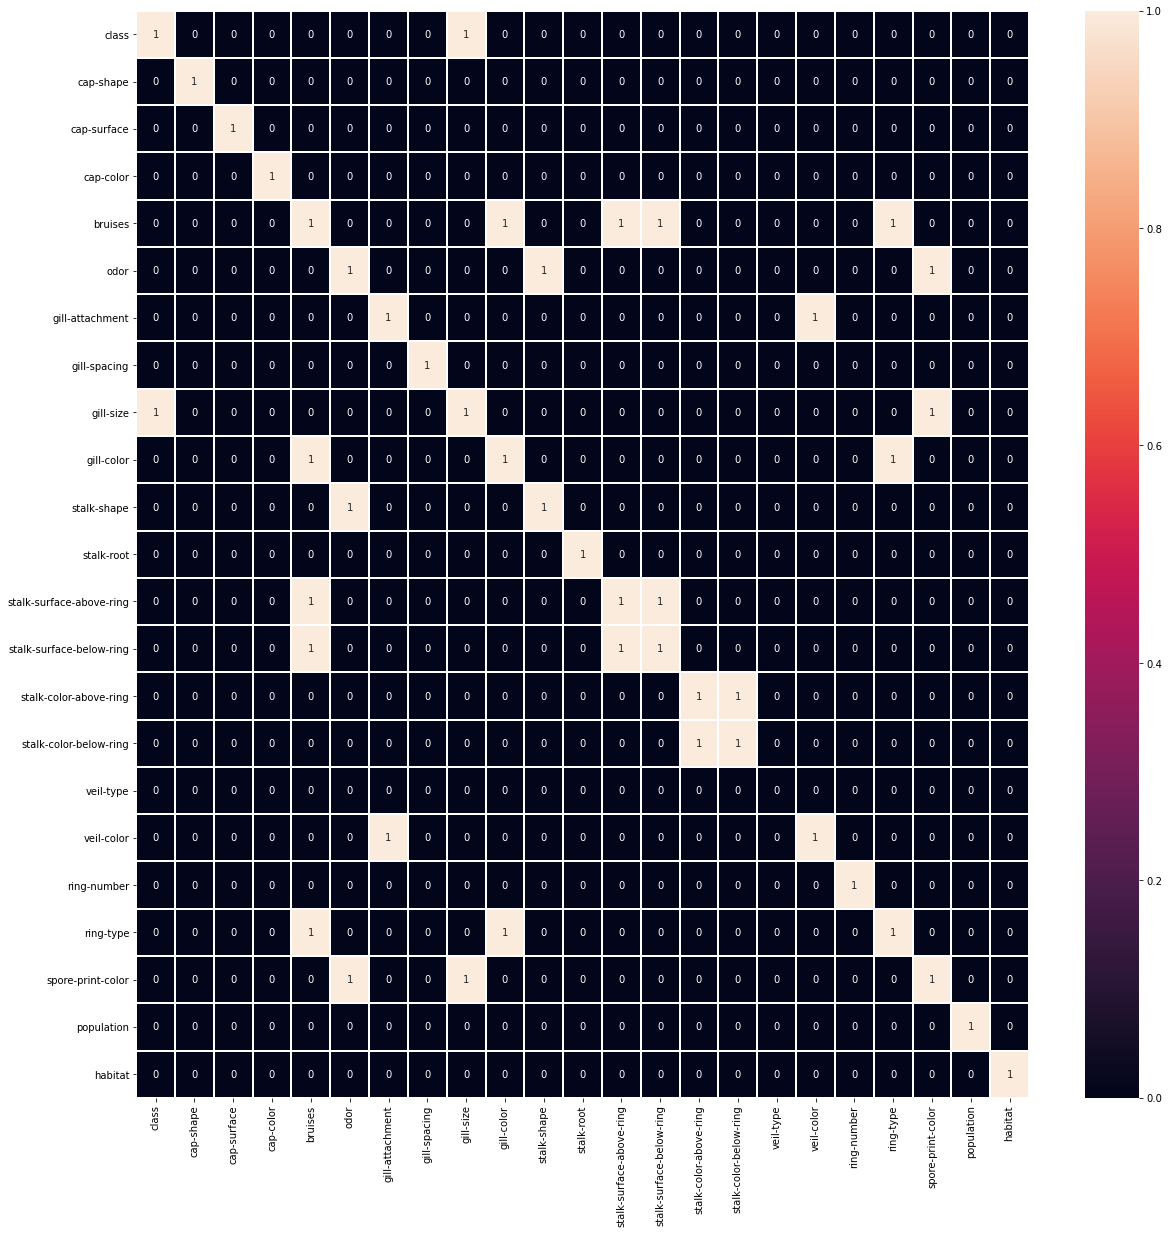

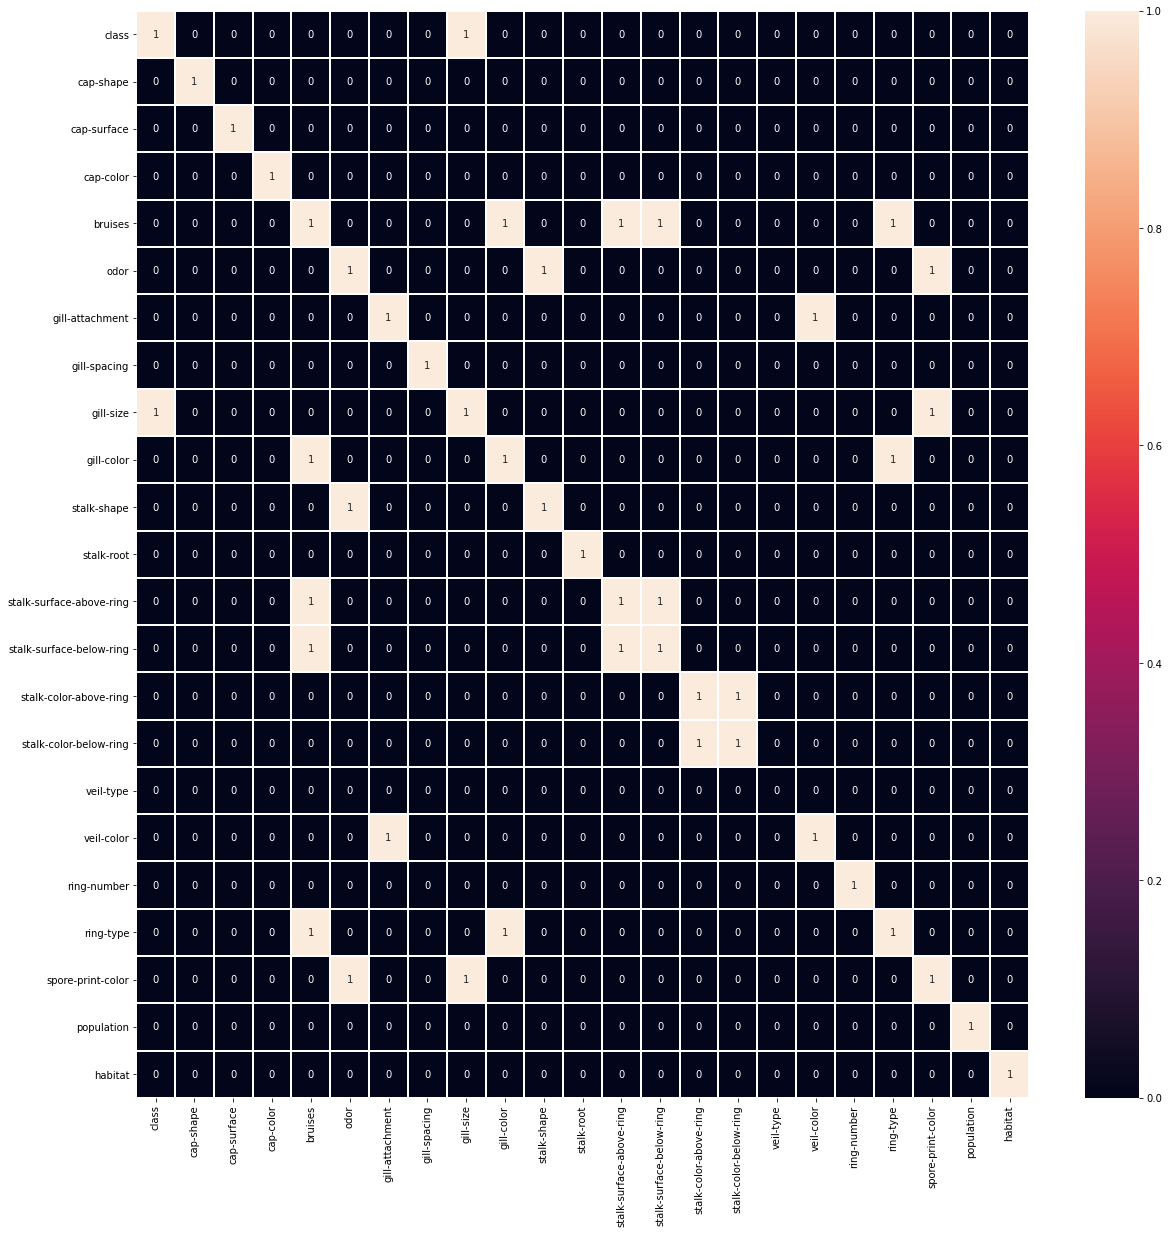

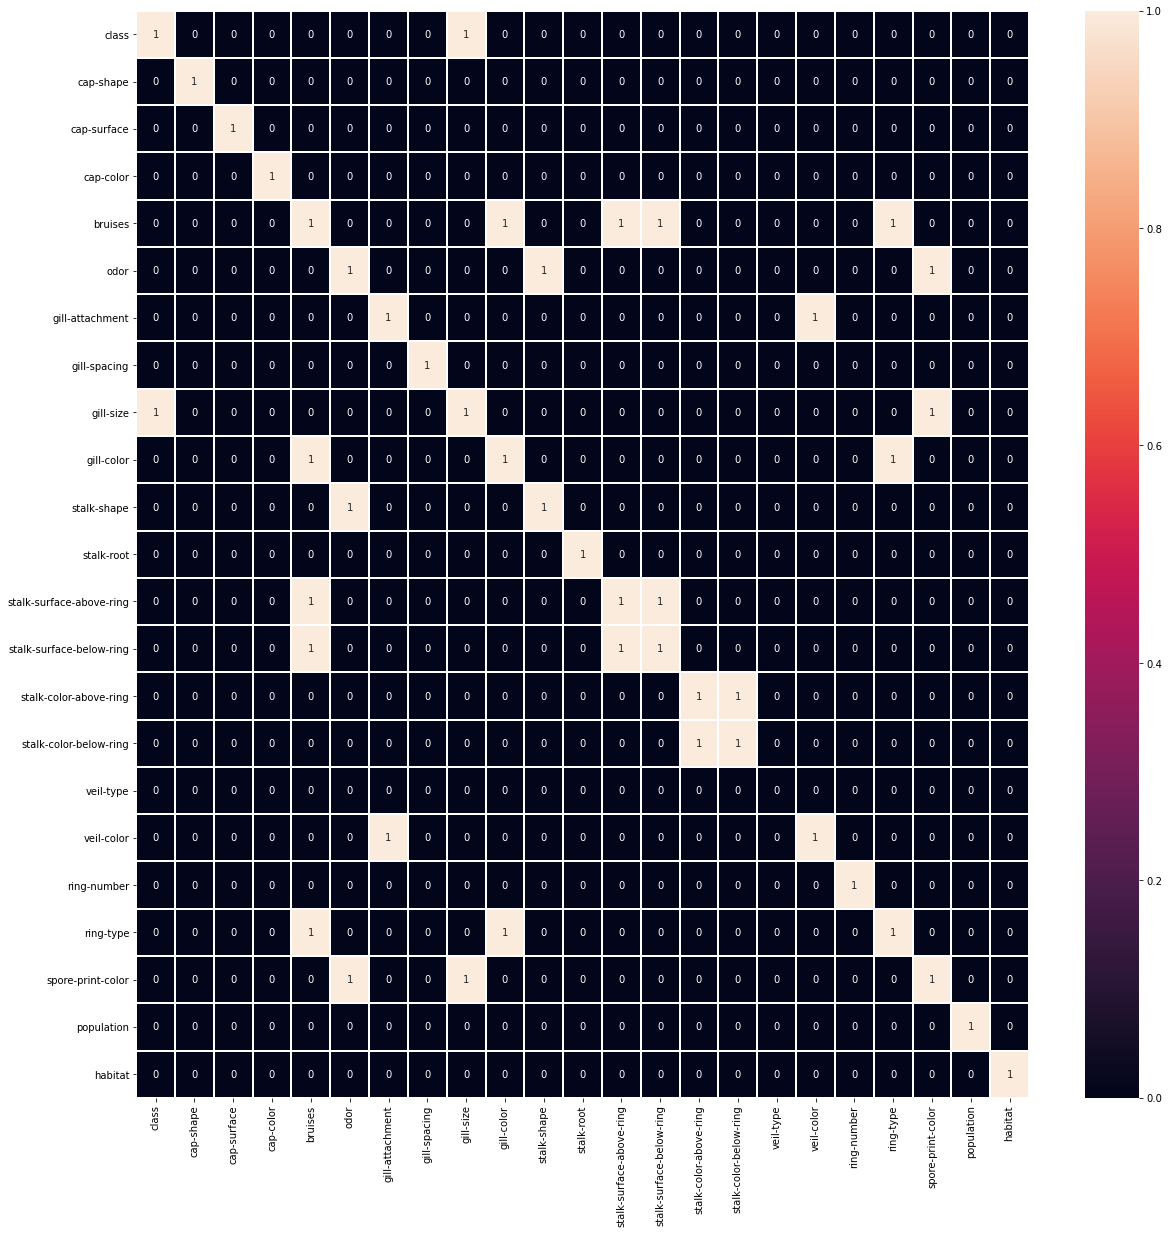

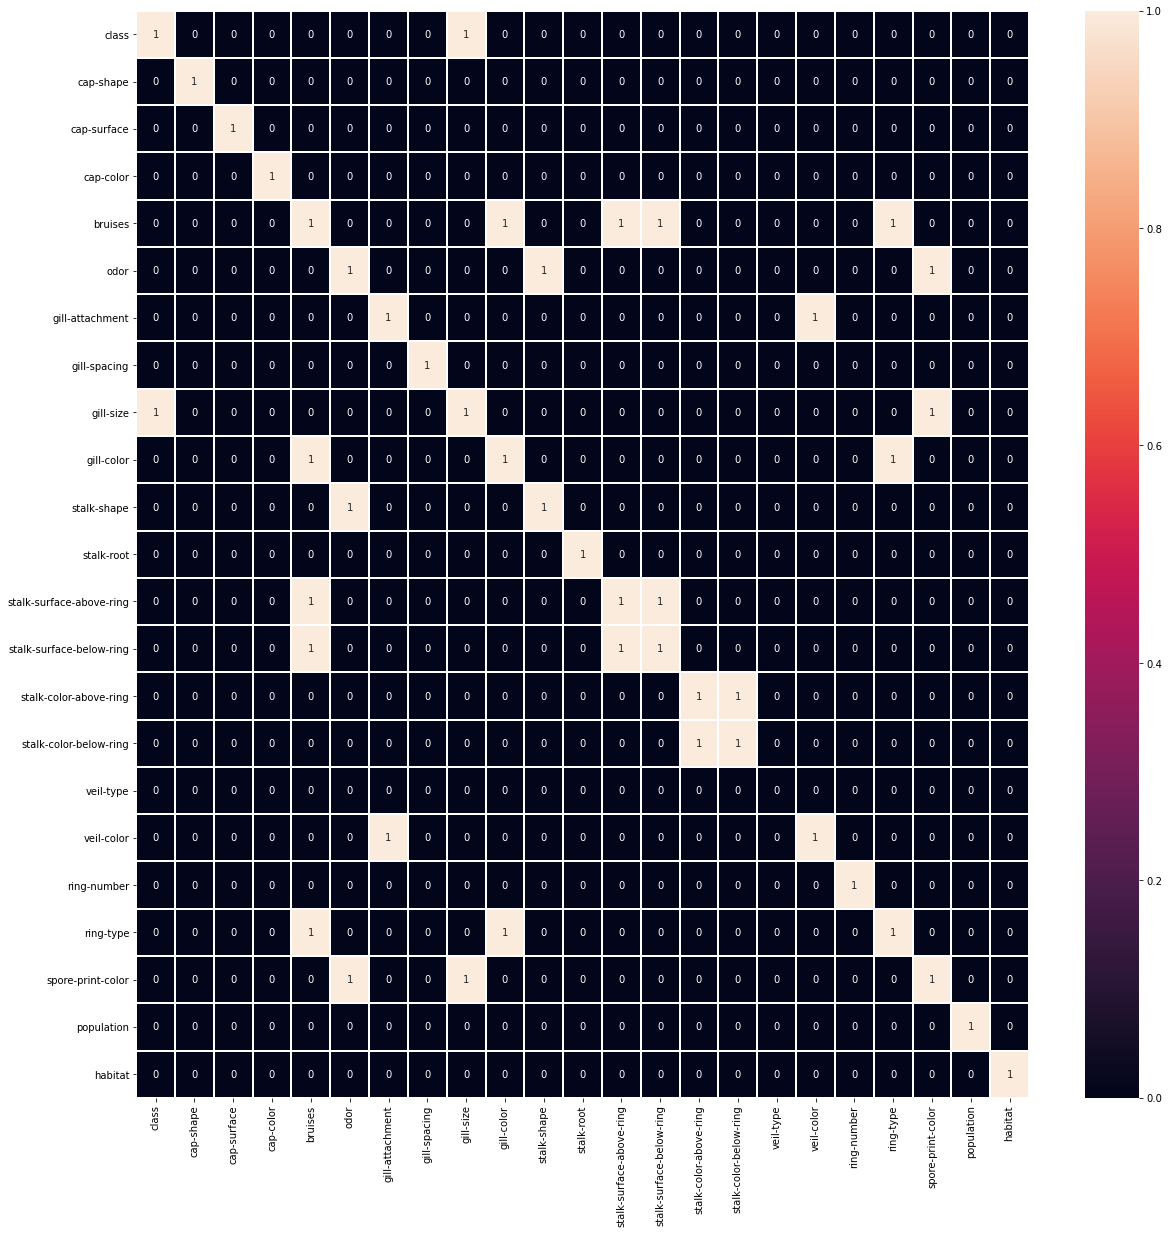

In [9]:
a = 0
while a<=0.5: 
    plt.subplots(figsize=(20, 20))
    sns.heatmap(df.corr()>0.4, annot = True, linewidths = 1)
    a+=0.1

In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [11]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [12]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                  -0.365280
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.129453
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 1.481287
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.342186
dtype: float64

In [13]:
df.columns[1:]

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

<AxesSubplot:xlabel='class', ylabel='population'>

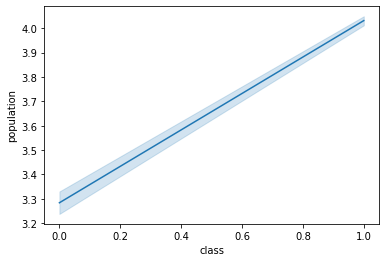

In [14]:
sns.lineplot(x='class',y='population',data=df)

<AxesSubplot:xlabel='population', ylabel='habitat'>

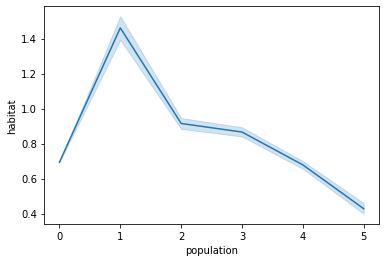

In [15]:
sns.lineplot(x='population',y='habitat',data=df)

<AxesSubplot:xlabel='stalk-root', ylabel='gill-color'>

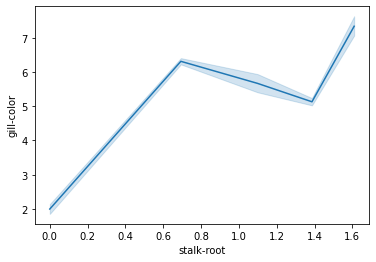

In [16]:
sns.lineplot(x='stalk-root',y='gill-color',data=df)

array([[<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'cap-shape'}>,
        <AxesSubplot:title={'center':'cap-surface'}>,
        <AxesSubplot:title={'center':'cap-color'}>,
        <AxesSubplot:title={'center':'bruises'}>],
       [<AxesSubplot:title={'center':'odor'}>,
        <AxesSubplot:title={'center':'gill-attachment'}>,
        <AxesSubplot:title={'center':'gill-spacing'}>,
        <AxesSubplot:title={'center':'gill-size'}>,
        <AxesSubplot:title={'center':'gill-color'}>],
       [<AxesSubplot:title={'center':'stalk-shape'}>,
        <AxesSubplot:title={'center':'stalk-root'}>,
        <AxesSubplot:title={'center':'stalk-surface-above-ring'}>,
        <AxesSubplot:title={'center':'stalk-surface-below-ring'}>,
        <AxesSubplot:title={'center':'stalk-color-above-ring'}>],
       [<AxesSubplot:title={'center':'stalk-color-below-ring'}>,
        <AxesSubplot:title={'center':'veil-type'}>,
        <AxesSubplot:title={'center':'veil-color'}>,


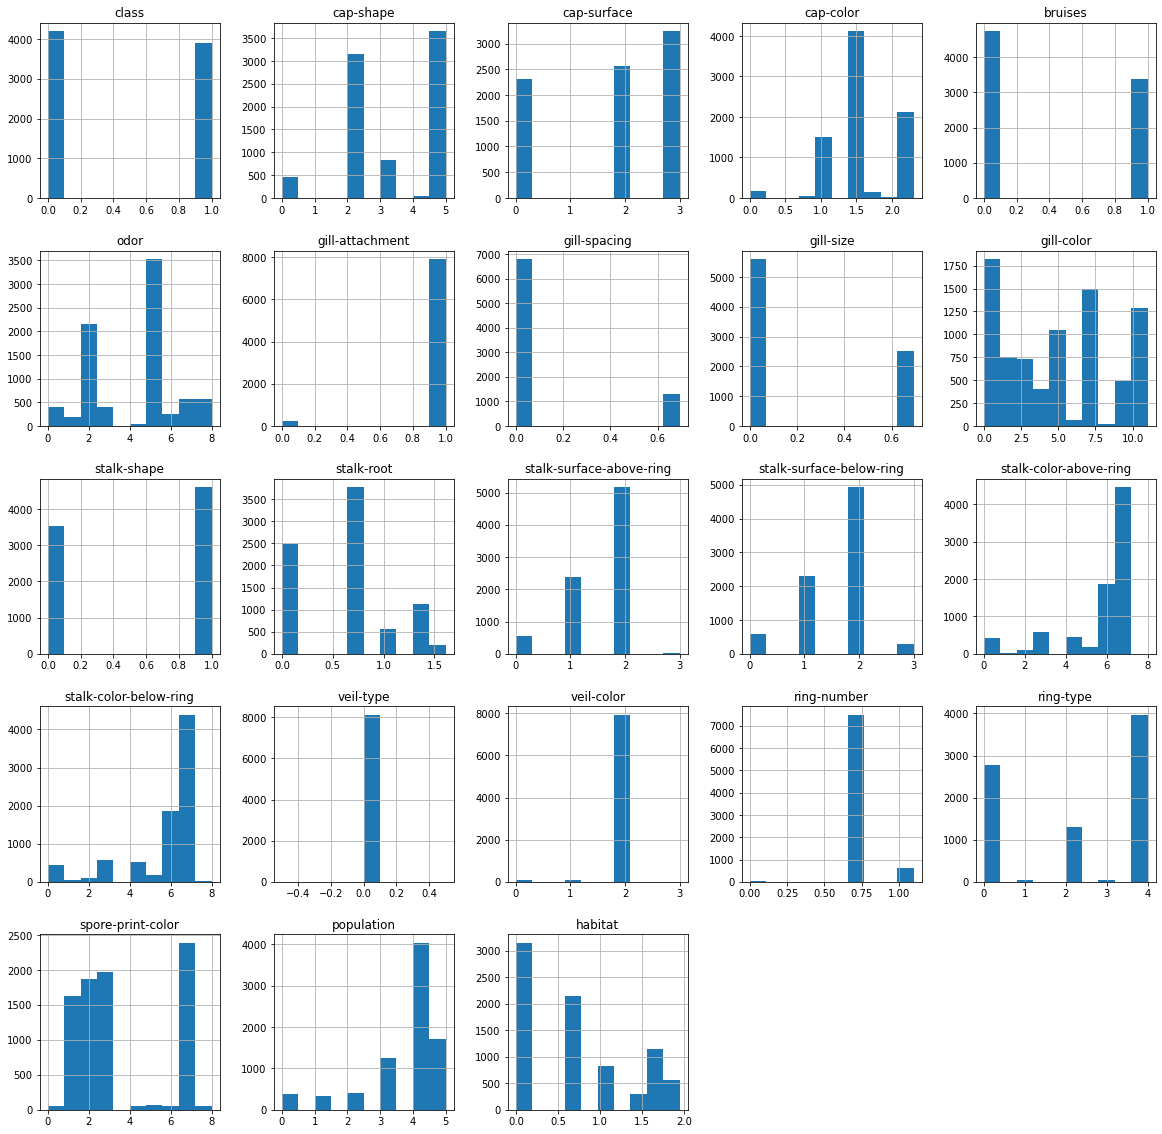

In [17]:
df.hist(figsize=(20,20))

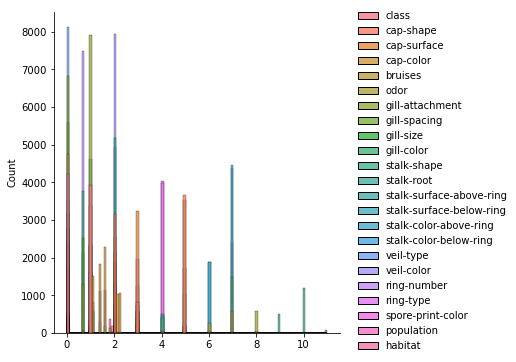

In [18]:
sns.displot(df)
plt.savefig("distplot.png")

In [19]:
data = df.iloc[:,1:]

In [20]:
labels = df.iloc[:,:1]

In [21]:
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,1.609438,1,6,1,0.000000,0.693147,4,0,...,2,7,7,0,2,0.693147,4,2,3,1.791759
1,5,2,2.302585,1,0,1,0.000000,0.000000,4,0,...,2,7,7,0,2,0.693147,4,3,2,0.693147
2,0,2,2.197225,1,3,1,0.000000,0.000000,5,0,...,2,7,7,0,2,0.693147,4,3,2,1.386294
3,5,3,2.197225,1,6,1,0.000000,0.693147,5,0,...,2,7,7,0,2,0.693147,4,2,3,1.791759
4,5,2,1.386294,0,5,1,0.693147,0.000000,4,1,...,2,7,7,0,2,0.693147,0,3,0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,1.609438,0,5,0,0.000000,0.000000,11,0,...,2,5,5,0,1,0.693147,4,0,1,1.098612
8120,5,2,1.609438,0,5,0,0.000000,0.000000,11,0,...,2,5,5,0,0,0.693147,4,0,4,1.098612
8121,2,2,1.609438,0,5,0,0.000000,0.000000,5,0,...,2,5,5,0,1,0.693147,4,0,1,1.098612
8122,3,3,1.609438,0,8,1,0.000000,0.693147,0,1,...,1,7,7,0,2,0.693147,0,7,4,1.098612


In [22]:
labels

,class
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


In [23]:
print("",data.shape,"\n",labels.shape)

 (8124, 22) 
 (8124, 1)


In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(data,labels,test_size=.25)

In [25]:
mnb=MultinomialNB()
mnb.fit(X_train,Y_train)
mnb.score(X_train,Y_train)
predmnb=mnb.predict(X_test)
print(accuracy_score(Y_test,predmnb))
print(confusion_matrix(Y_test,predmnb))
print(classification_report(Y_test,predmnb))

0.7986213687838504
[[951  74]
 [335 671]]
              precision    recall  f1-score   support

           0       0.74      0.93      0.82      1025
           1       0.90      0.67      0.77      1006

    accuracy                           0.80      2031
   macro avg       0.82      0.80      0.79      2031
weighted avg       0.82      0.80      0.79      2031



In [26]:
svc=SVC(kernel='poly')
svc.fit(X_train,Y_train)
svc.score(X_train,Y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

0.9896602658788775
[[1022    3]
 [  18  988]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1025
           1       1.00      0.98      0.99      1006

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



In [27]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
dtc.score(X_train,Y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(Y_test,preddtc))
print(confusion_matrix(Y_test,preddtc))
print(classification_report(Y_test,preddtc))

1.0
[[1025    0]
 [   0 1006]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1025
           1       1.00      1.00      1.00      1006

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [28]:
dt=KNeighborsClassifier()
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)
preddt=dt.predict(X_test)
print(accuracy_score(Y_test,preddt))
print(confusion_matrix(Y_test,preddt))
print(classification_report(Y_test,preddt))

0.999015263417036
[[1023    2]
 [   0 1006]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1025
           1       1.00      1.00      1.00      1006

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [29]:
mnb1=MultinomialNB()
score=cross_val_score(mnb1,data,labels,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.56503015 0.65202412 0.63393626 0.71317829 0.95948276 0.89051724
 0.82844828]
0.7489452994064061
0.13544330188334527


In [30]:
sv=SVC()
score=cross_val_score(sv,data,labels,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.77002584 0.99397071 0.97932817 0.87596899 0.9887931  0.98103448
 0.5862069 ]
0.8821897421536555
0.14307375826648872


In [31]:
job.dump(dtc,'mushroom.obj')

['mushroom.obj']